
# Google Playstore -EDA

Domain-Mobile App

Approach: This phase will include analysing datasets to summarize their main characteristics, often with visual methods. A statistical model can be used,
          but primarily EDA will be used for seeing what the data can tell us beyond the formal modelling or hypothesis testing task.

        

# Data Analysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("F:\datasets for practice\googleplaystore.csv")
pd.set_option("display.max_rows",False)
data=data.drop_duplicates(subset=["App"])

In [3]:
data.App.value_counts()

White Sound Pro                    1
ivi - movies and TV shows in HD    1
Sic Bo Rave                        1
NTES                               1
BC Lotto Check                     1
Mama Lala 's song                  1
QR Droid                           1
Imperium CF                        1
Team CF                            1
EMT Tutor NREMT-B Study Guide      1
DO YOU KNOW THE WAY Soundboard     1
STUCOR - AU                        1
                                  ..
BZ Straußenführer                  1
SkyTest BU/GU Lite                 1
Chat Click - Dating Search         1
Dr. B.R.Ambedkar                   1
News Republic                      1
9th stage                          1
Flo's CH Boss Timer                1
FINAL FANTASY DIMENSIONS           1
BL Kennedy Theme                   1
Can Your Pet? : Returns - Teen     1
HD Mickey Minnie Wallpapers        1
PhotoScan by Google Photos         1
Name: App, Length: 9660, dtype: int64

In [4]:
data.shape

(9660, 13)

In [5]:
data.isnull().sum()/data.count()*100

App                0.000000
Category           0.000000
Rating            17.847993
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.010353
Price              0.000000
Content Rating     0.010353
Genres             0.000000
Last Updated       0.000000
Current Ver        0.082884
Android Ver        0.031066
dtype: float64

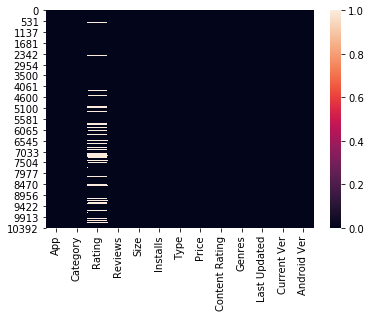

In [314]:
sns.heatmap(data.isnull())
plt.show()

In [6]:
data=data.dropna()

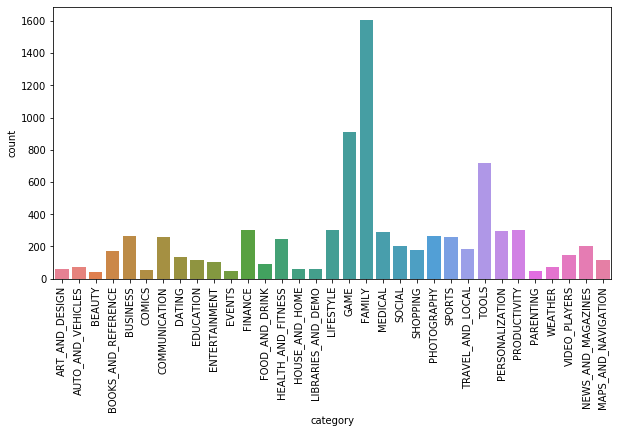

In [7]:
# Category 
plt.figure(figsize=(10,5))
sns.countplot(data.Category,palette="husl")
plt.xlabel("category")
plt.xticks(rotation=90)
plt.show()

Categories Family,Game and Tools are mostly used, lets check this family category.

In [9]:
family=data.loc[data["Category"]=="FAMILY"]
family.App.head(20)

2017                         Jewels Crush- Match 3 Puzzle
2018                                     Coloring & Learn
2019                                              Mahjong
2020    Super ABC! Learning games for kids! Preschool ...
2021                                        Toy Pop Cubes
2022                             Educational Games 4 Kids
2023                                      Candy Pop Story
2027                                          Candy Smash
2028                       Happy Fruits Bomb - Cube Blast
2030                          Princess Adventures Puzzles
2031                         Kids Educational Game 3 Free
2032      Puzzle Kids - Animals Shapes and Jigsaw Puzzles
2034                                      Baby Panda Care
2035                         Kids Educational :All in One
2036     Number Counting games for toddler preschool kids
2037                                       Toca Kitchen 2
2038                           PJ Masks: Moonlight Heroes
2039          

So the category family have mobile games and learning for children.

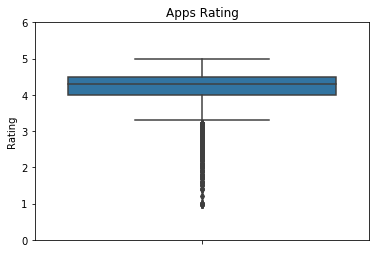

In [10]:
#rating
sns.boxplot(y=data["Rating"])
plt.ylim(0,6)
plt.title("Apps Rating")
plt.show()


The average rating for most of the apps is 4.3 .

In [11]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


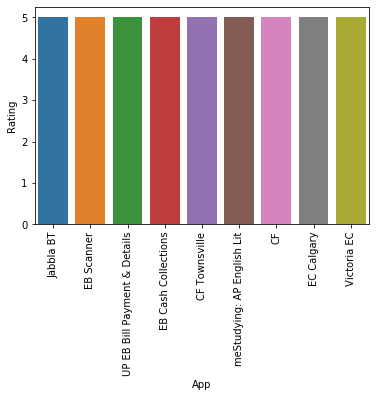

In [12]:
# 10 Top rated apps 
top_rated=data.sort_values(by=["Rating"],ascending=False).head(10)
top_rated=top_rated[1:]
sns.barplot(x=top_rated["App"],y=top_rated["Rating"])
plt.xlabel("App")
plt.ylabel("Rating")
plt.xticks(rotation=90)
plt.show()

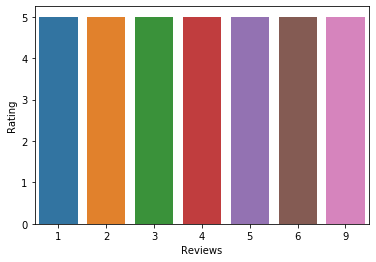

In [13]:
top_rated.Reviews=pd.to_numeric(top_rated["Reviews"])
sns.barplot(x=top_rated["Reviews"],y=top_rated["Rating"])
plt.show()

The rating is not dependend on reviews.

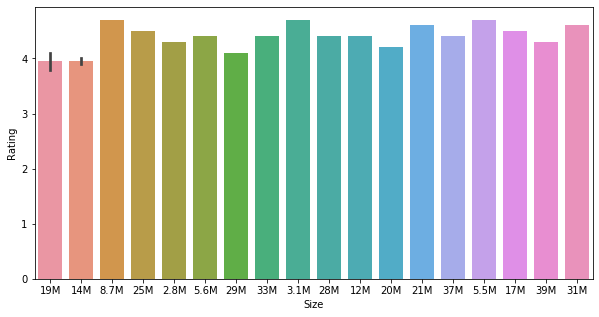

In [14]:
temp=data.head(20)
plt.figure(figsize=(10,5))
sns.barplot(x=temp.Size,y=temp.Rating)
plt.show()

Also Rating is size independent.

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 10840
Data columns (total 13 columns):
App               8190 non-null object
Category          8190 non-null object
Rating            8190 non-null float64
Reviews           8190 non-null object
Size              8190 non-null object
Installs          8190 non-null object
Type              8190 non-null object
Price             8190 non-null object
Content Rating    8190 non-null object
Genres            8190 non-null object
Last Updated      8190 non-null object
Current Ver       8190 non-null object
Android Ver       8190 non-null object
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [16]:
data.Installs=data.Installs.astype(str)
data.Installs=data.Installs.apply(lambda x:x.replace(",",""))
data.Installs=data.Installs.replace("Free",np.nan)
data.Installs=data.Installs.apply(lambda x:x.replace("+",""))


In [17]:
data.Installs=pd.to_numeric(data.Installs)

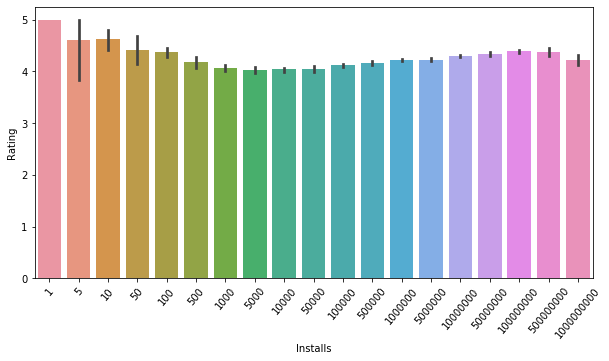

In [18]:
temp=data.copy()
temp=temp.sort_values(by=["Installs"],ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=temp["Installs"],y=temp["Rating"])
plt.xticks(rotation=50)
plt.show()

Rating have a relationhip with Number of installs

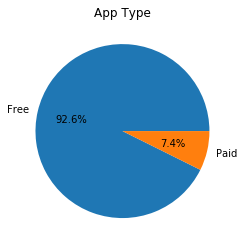

In [19]:
labels=data.Type.unique()
plt.pie(data["Type"].value_counts()/data.Type.count(),labels=labels,autopct='%1.1f%%')
plt.title("App Type")
plt.show()


In [20]:
free=data.loc[data["Type"]=="Free"]
paid=data.loc[data["Type"]=="Paid"]

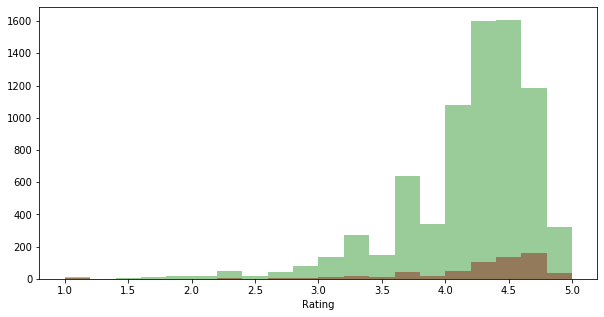

In [21]:

plt.figure(figsize=(10,5))
sns.distplot(free.Rating,color="green",kde=False,bins=20)
sns.distplot(paid.Rating,color="darkred",kde=False,bins=20)
plt.show()


Is paid apps get good rating ?

not all but yes majority of paid have rating more tha 4 as compared to free apps.

In [22]:
paid.Price=paid.Price.apply(lambda x:x.replace("$",""))




C:\Users\mandh\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


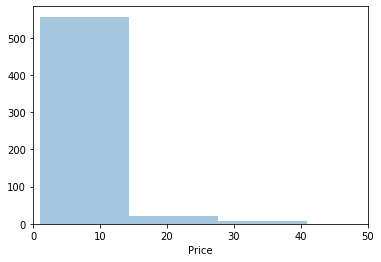

In [23]:
paid.Price=pd.to_numeric(paid.Price)
sns.distplot(paid.Price,kde=False,bins=30)
plt.xlim(0,50)
plt.show()

Most Apps are priced between 1 and 13 dollars

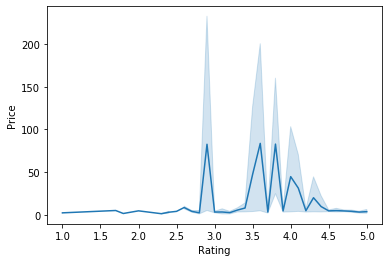

In [28]:
sns.lineplot(x=paid.Rating,y=paid.Price)
plt.show()

Rating is independent of price.

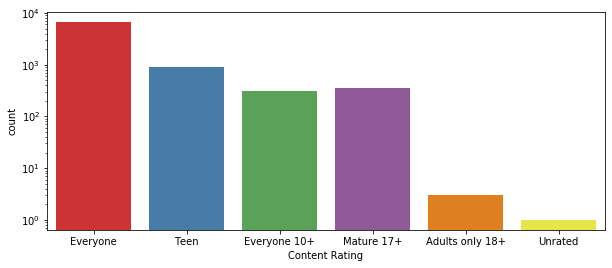

In [29]:
plt.figure(figsize=(10,4))
sns.countplot(data["Content Rating"],palette="Set1")
plt.yscale("log")
plt.show()

In [30]:
data.Genres.unique()
#data is in the form of category and subcategory
data["genre_category"]=data.Genres.apply(lambda x:x.split(";")[0])
data["genresub_cat"]=data.Genres.apply(lambda x:x.split(";")[-1])
Genre=data.groupby(["genre_category","genresub_cat"])

In [31]:
Genre.size().head(10)

genre_category  genresub_cat      
Action          Action                292
                Action & Adventure     12
Adventure       Action & Adventure      5
                Adventure              71
                Brain Games             1
                Education               1
Arcade          Action & Adventure     13
                Arcade                171
                Pretend Play            1
Art & Design    Art & Design           54
dtype: int64

In [32]:
data["Last Updated"]

0           January 7, 2018
1          January 15, 2018
2            August 1, 2018
3              June 8, 2018
4             June 20, 2018
5            March 26, 2017
6            April 26, 2018
7             June 14, 2018
8        September 20, 2017
9              July 3, 2018
10         October 27, 2017
11            July 31, 2018
                ...        
10826        March 23, 2018
10827         June 13, 2018
10828          May 15, 2017
10829         June 19, 2016
10830      January 20, 2014
10832     February 16, 2014
10833        March 23, 2014
10834         June 18, 2017
10836         July 25, 2017
10837          July 6, 2018
10839      January 19, 2015
10840         July 25, 2018
Name: Last Updated, Length: 8190, dtype: object

In [50]:

data["Last Updated"]=pd.to_datetime(data["Last Updated"])
data["days"]=data["Last Updated"].apply(lambda x:pd.to_datetime("2020-05-22") -x)

In [51]:
data.days=data.days.apply(lambda x: x.days)

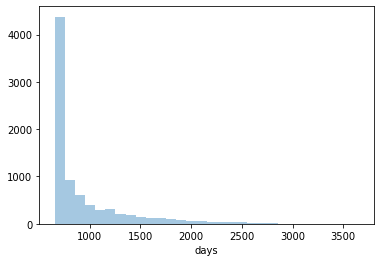

In [77]:
data=data.sort_values(by=["days"],ascending=False)
data.days
sns.distplot(data.days,kde=False,bins=30)
plt.show()

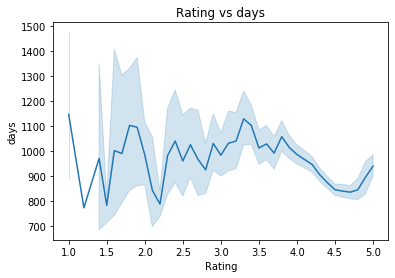

In [66]:
sns.lineplot(x=data.Rating,y=data.days)
plt.title("Rating vs days")
plt.show()

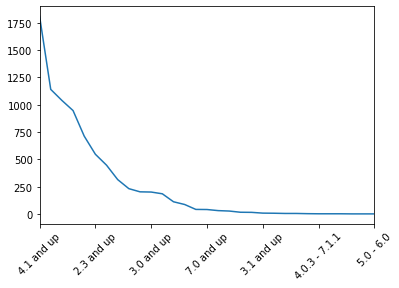

In [71]:
data["Android Ver"].value_counts().plot()
plt.xticks(rotation=45)
plt.show()

In [75]:
data["Current Ver"].unique()

array(['3.1', '1.2', '1.2.4', ..., '0.0.80', '3.4.500', '7.3.2'],
      dtype=object)

In [73]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'genre_category', 'genresub_cat', 'days'],
      dtype='object')

So,Apps on  android version 4.1 is most popular. 

# summary

According to our data three categories are widely used which is Family (games and other apps for children), Games and Tools created on android version 4.1, and up with size from KB to MB and some vary with device. In which 93 percent of the Apps are free and the price of most of the Apps is between 1 and 13 dollars, within a year or two an update is out in the market.

In the initial analysis, we found the average rating of Apps is 4.3 approx and it is not affected by the number of reviews, Size, Price.
